In [947]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pe

In [948]:
#Read csv file
df = pd.read_csv('/Users/mac/Desktop/Project/Sample/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [949]:
#Check data shape
df.shape 
#Data has 8807 rows and 12 columns

(8807, 12)

In [950]:
#Check data type
df.dtypes
#Most of the data type are object, except the release_year is int

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [951]:
#Check NaN value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [952]:
#Describe release_year column with data type is int
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [953]:
#Describe columns with data type is object
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [954]:
#Replace NaN in country, rating and duration columns by frequency
df['country'].replace(np.nan, 'United States', inplace = True)
df['rating'].replace(np.nan, 'TV-MA', inplace = True) 
df['duration'].replace(np.nan, '1 Season', inplace = True)

In [955]:
#Re-check NaN value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [956]:
#Drop description column
df.drop('description', inplace = True, axis = 1)

In [957]:
#Change Quantitative variable to Categorical variable
df_dummies = pd.get_dummies(df['type'])
df_dummies.head()

,Movie,TV Show
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [958]:
#Add new dataframe to the old one, and drop the type columns
df = pd.concat([df, df_dummies], axis = 1)
df.drop('type', axis = 1, inplace = True)
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Movie,TV Show
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,1,0
1,s2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",0,1
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",0,1
3,s4,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",0,1
4,s5,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",0,1


In [959]:
#Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
df = df.sample(n=500, random_state=42)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


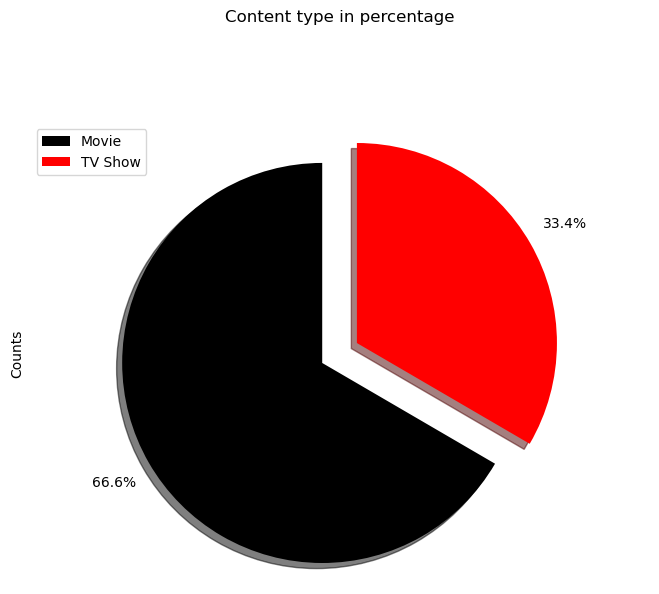

In [960]:
#Content type in percentage using pie chart
#Slicing data, caculate total value from Movie and TV Show and reset index as default
df_type = df.loc[:, ['Movie', 'TV Show']].sum(axis = 0).reset_index()
df_type.columns = ['Type', 'Counts']
df_type.set_index('Type', inplace = True)
df_type.head()
#Plot the pie chart
color_list = ['black', 'red']
df_type.plot(kind = 'pie',
             figsize = (8, 6),
             autopct = '%1.1f%%',
             startangle = 90,
             shadow = True,
             labels = None,
             pctdistance = 1.2,
             colors = ['black', 'red'],
             explode = [0.1, 0.1],
             subplots = True)
plt.title('Content type in percentage', y = 1.2)
plt.axis('equal')
plt.legend(labels = df_type.index, loc = 'upper left') 
plt.show()  

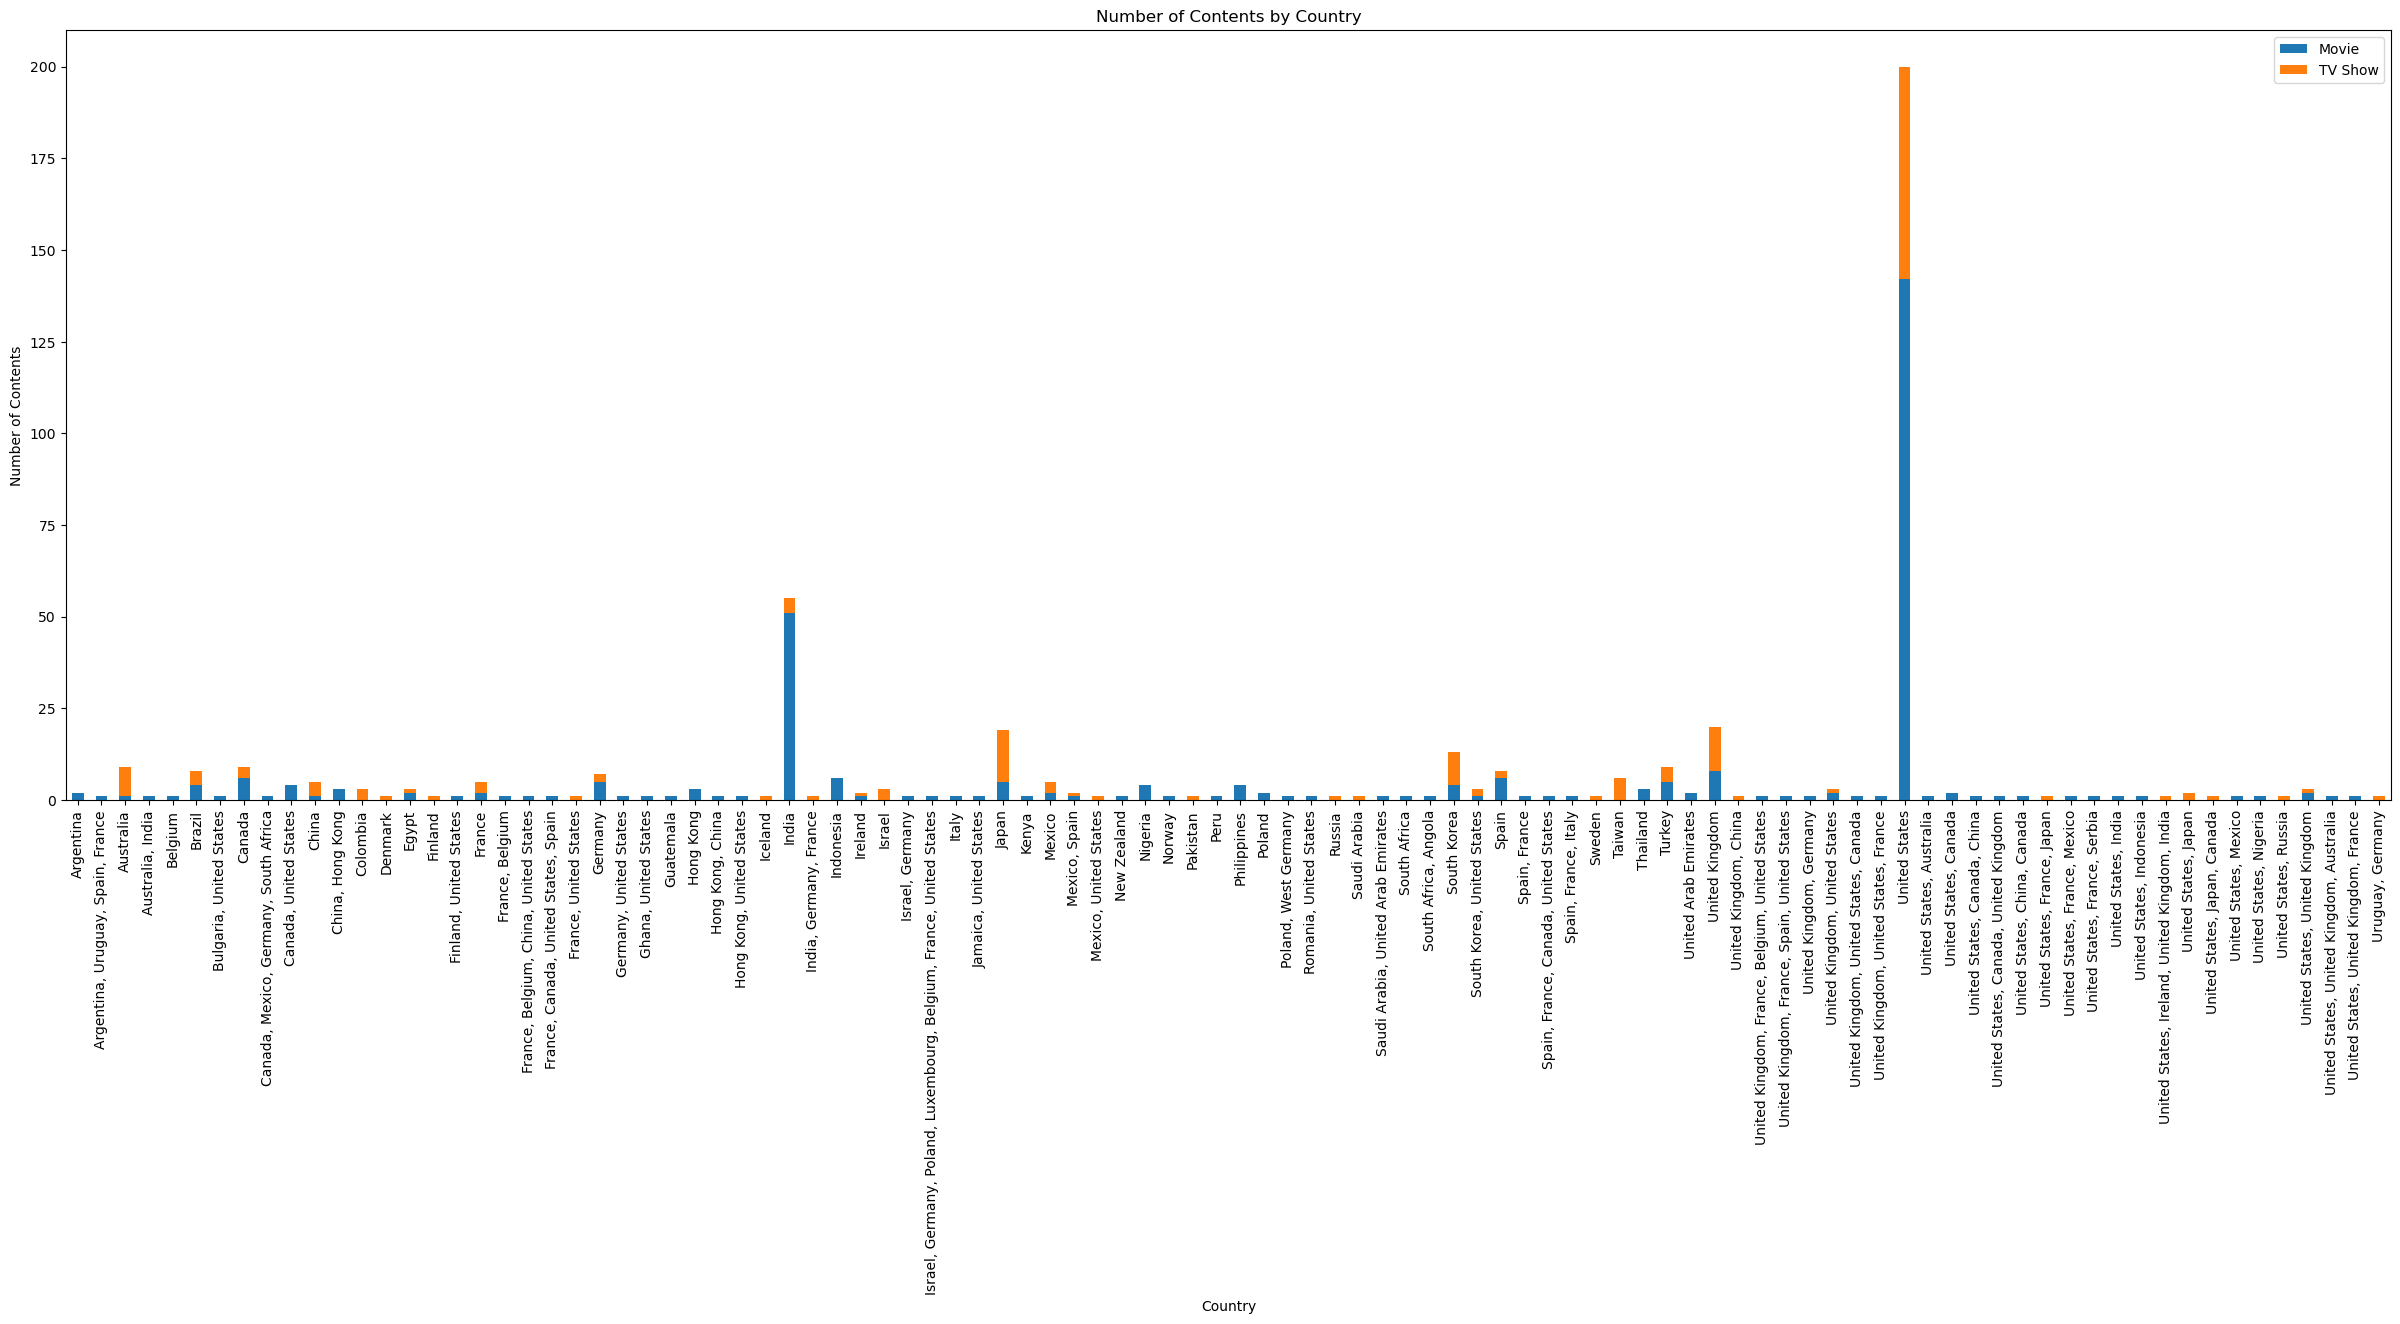

In [961]:
#Number of Contents by Country using horizontal bar
#Slicing data, group by country to caculate total value from Movie and TV Show and reset index as default
df_country = df.loc[:, ['country', 'Movie', 'TV Show']].groupby('country').sum().reset_index()
df_country.sort_values(by = 'country', ascending = True, inplace = True)
df_country.set_index('country', inplace = True)
df_country.head()
#Plot the bar chart
df_country.plot(kind = 'bar', figsize = (30, 10), stacked = True)
plt.title('Number of Contents by Country')
plt.xlabel('Country')
plt.ylabel('Number of Contents')
plt.show()

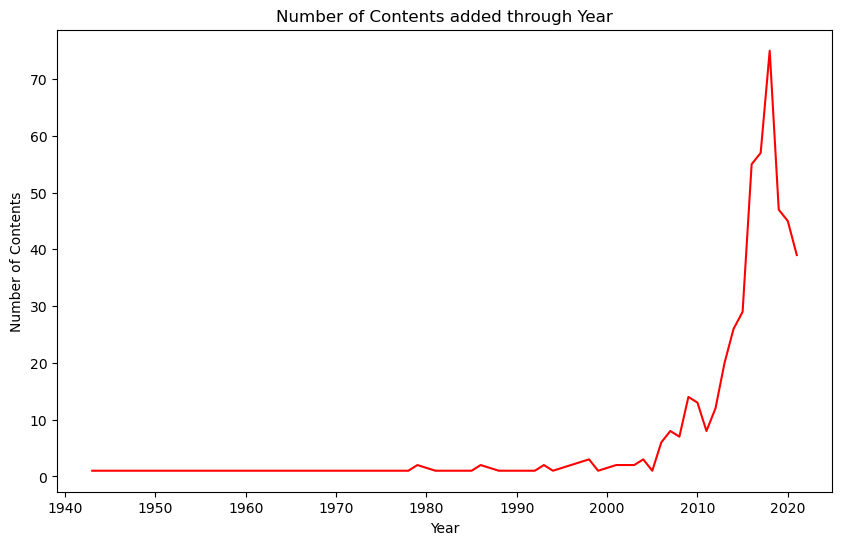

In [962]:
#Number of Contents added through Year using line chart
#Slicing data, group by release year to caculate total value from Movie and TV Show and reset index as default
df_content = df.loc[:, ['release_year', 'TV Show', 'Movie']].groupby('release_year').sum()
#Add new column to the data frame and caculate the total Content
df_content['Total'] = df_content.sum(axis = 1)
#Plot the line data
df_content['Total'].plot(kind = 'line', color = 'r', figsize = (10,6))
plt.title('Number of Contents added through Year')
plt.xlabel('Year')
plt.ylabel('Number of Contents')
plt.show()

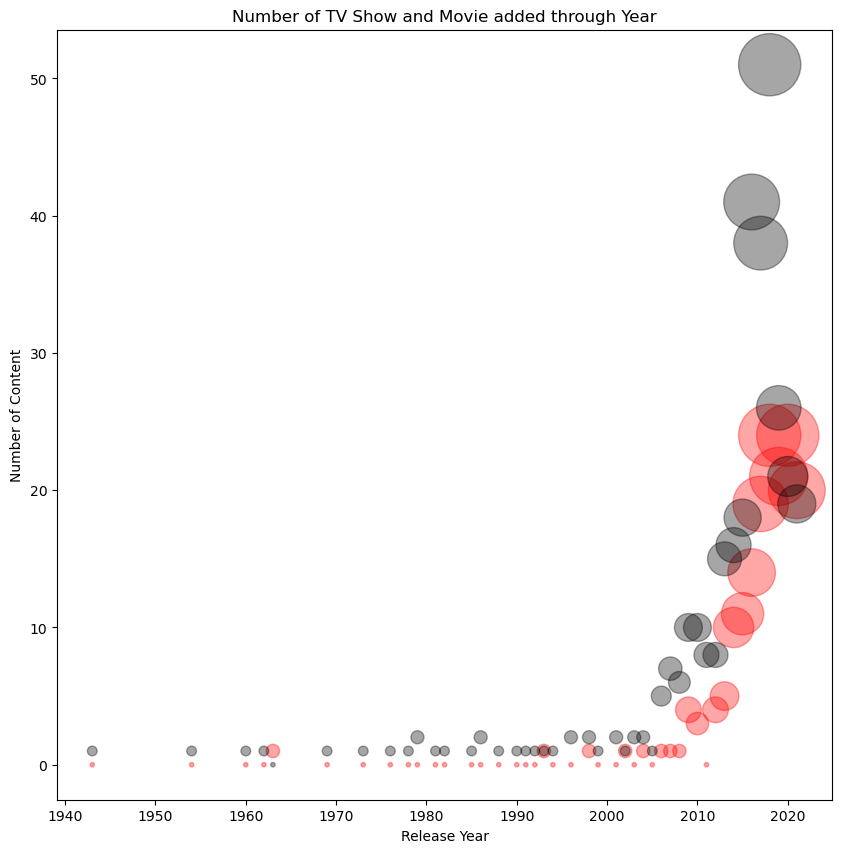

In [963]:
#Number of TV Show and Movie added through Year using bubble chart
#Slicing data, group by release year to caculate total value from Movie and TV Show and reset index as default
df_years = df.loc[:, ['release_year', 'TV Show', 'Movie']].groupby('release_year').sum().reset_index()
#Sort the value in ascending order
df_years.sort_values(by = 'release_year', ascending = True, inplace = True)
df_years.head()
#Simple Feature Scalling
df_tv = df_years['TV Show']/df_years['TV Show'].max()
df_movie = df_years['Movie']/df_years['Movie'].max()
#Plot the bubble chart
ax0 = df_years.plot(kind = 'scatter',
                    figsize = (10, 10),
                    x = 'release_year',
                    y = 'TV Show',
                    s = df_tv*2000+10,
                    color = 'r',
                    alpha = 0.35)
ax1 = df_years.plot(kind = 'scatter',
                    x = 'release_year',
                    y = 'Movie',
                    s = df_movie*2000+10,
                    color = 'black',
                    alpha = 0.35,
                    ax = ax0)
plt.title('Number of TV Show and Movie added through Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Content')
plt.show()

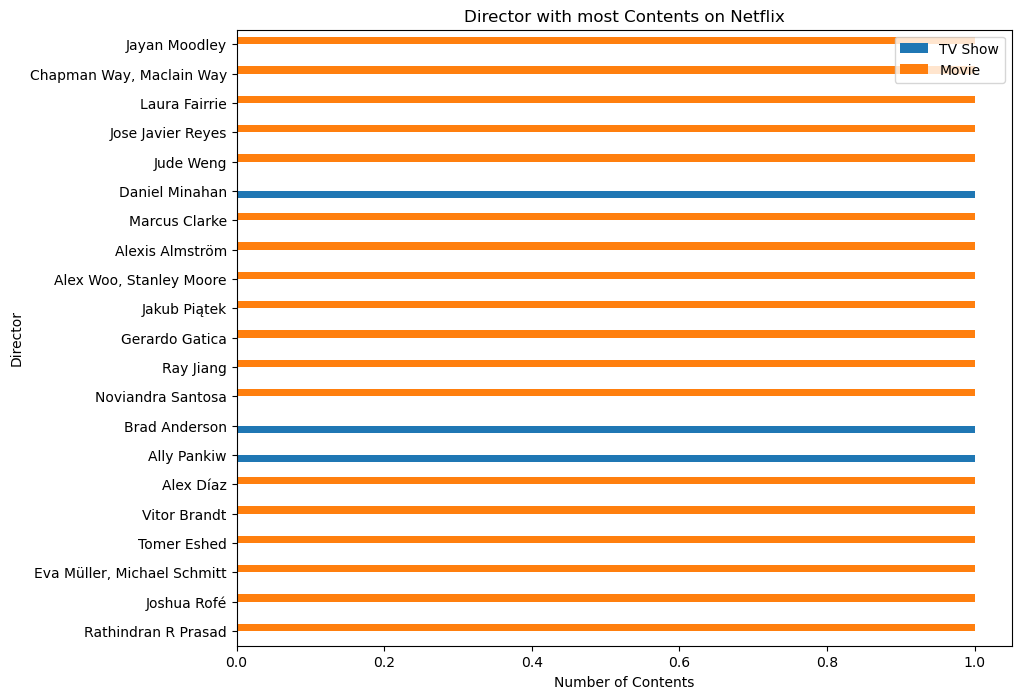

In [964]:
#Director with most Contents in 2021 on Netflix with horizontal bar
##licing data, group by release year to caculate total value from Movie and TV Show and reset index as default
df_direct = df[['director', 'TV Show', 'Movie', 'release_year']].groupby('release_year').get_group(2021)
#Drop NaN value
df_direct.dropna(inplace = True)
#Check duplicated value in director column
df_direct[['director']].duplicated()
#Set the director column as index
df_direct.set_index('director', inplace = True)
#Drop the release year column
df_direct.drop('release_year', inplace = True, axis = 1)
#Plot the horizontal bar
df_direct.plot(kind = 'barh', figsize = (10, 8))
plt.title('Director with most Contents on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Director')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


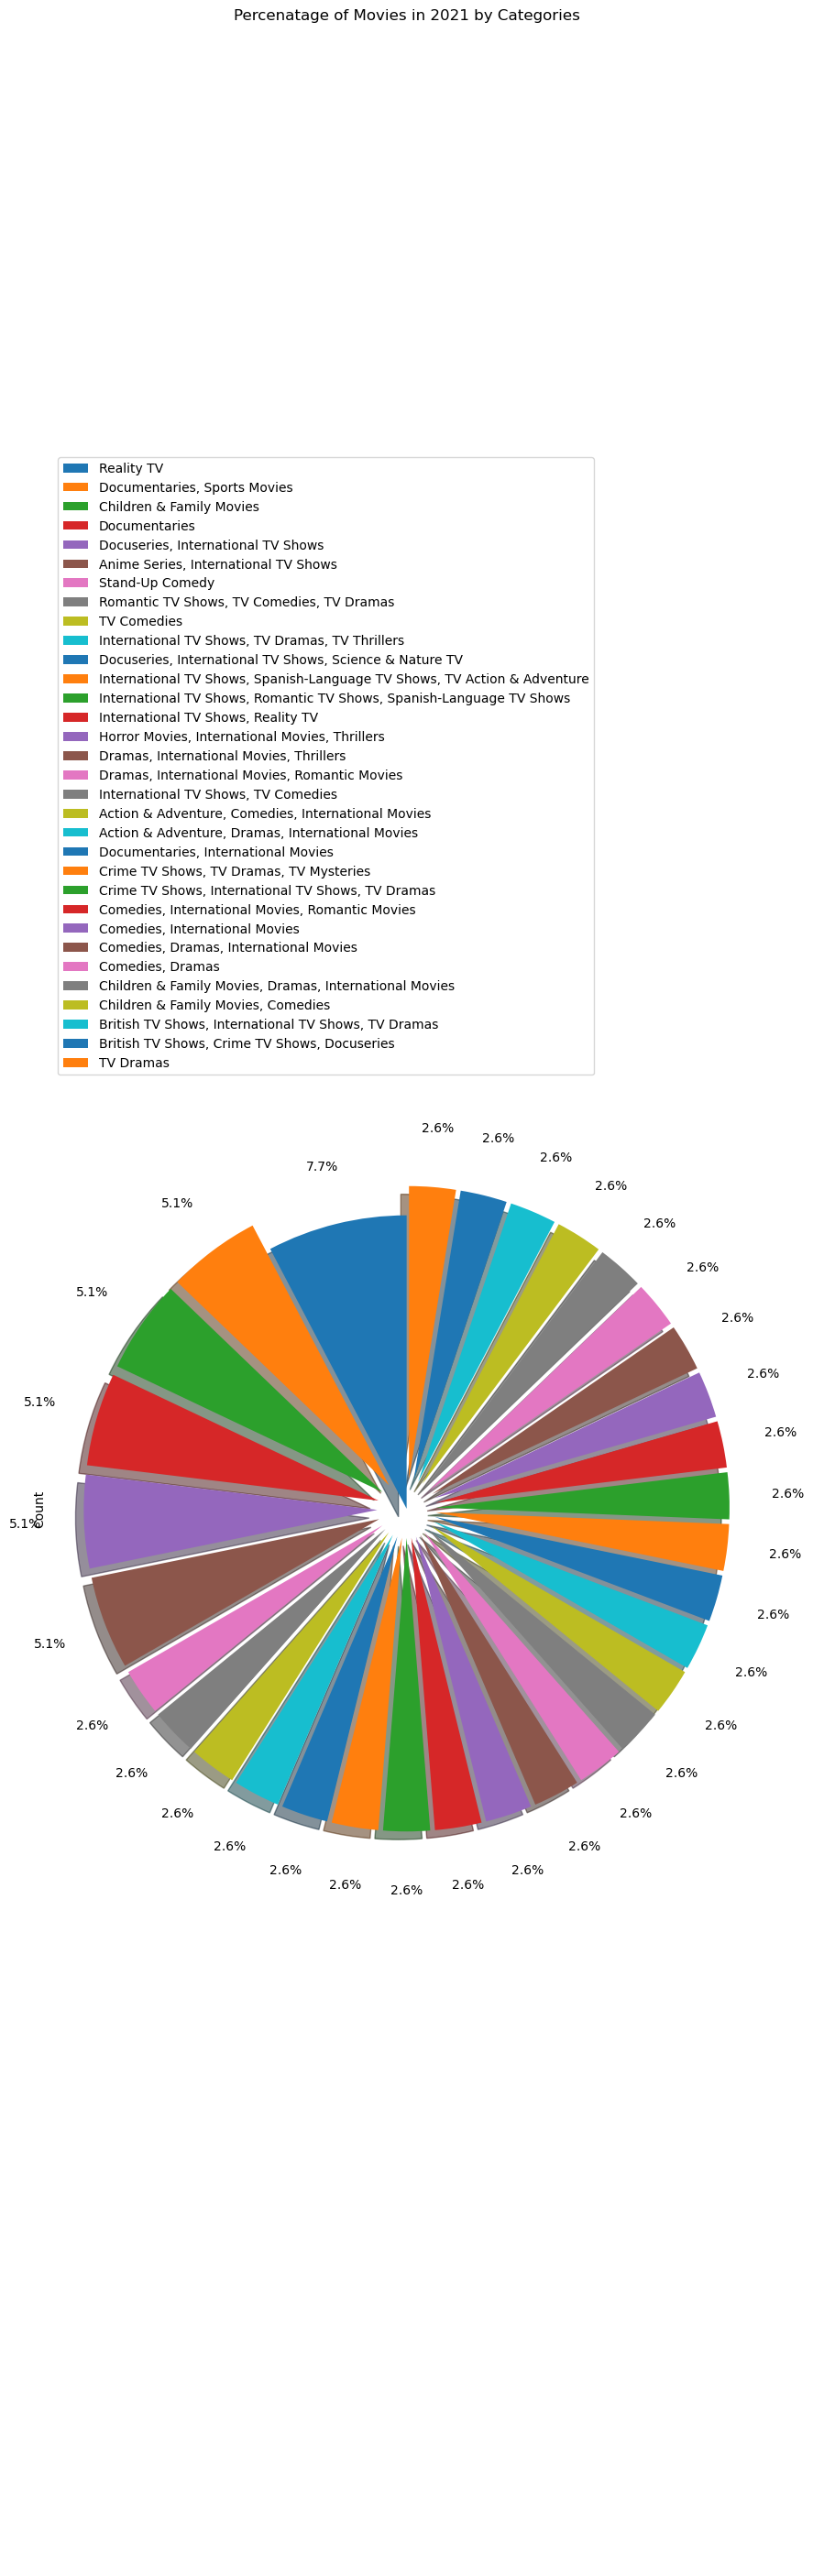

In [965]:
#Percenatage of Movies in 2021 by Categories using box plot
#Slicing data with criteria
condition = df['release_year'] == 2021
#Define new data frame
df_condition = df[condition]
#Slicing data, group by listed_in and count the value in the listed_in column
df_groupby = df_condition.loc[:, ['listed_in']].groupby('listed_in').value_counts()
#Convert the series to data frame
df_category = df_groupby.to_frame()
#Rename column
df_category.columns = ['Count']
#Sort the value in descending order
df_category.sort_values(by = 'Count', ascending = False, inplace = True)
#Plot the pie chart
df_category.plot(kind = 'pie',
         figsize = (10, 30),
         autopct = '%1.1f%%',
         startangle = 90,
         shadow = True,
         labels = None,
         pctdistance = 1.2,
         subplots = True,
          explode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.title('Percenatage of Movies in 2021 by Categories', y = 1.2)
plt.axis('equal')
plt.legend(labels = df_category.index, loc = 'upper left')
plt.show()

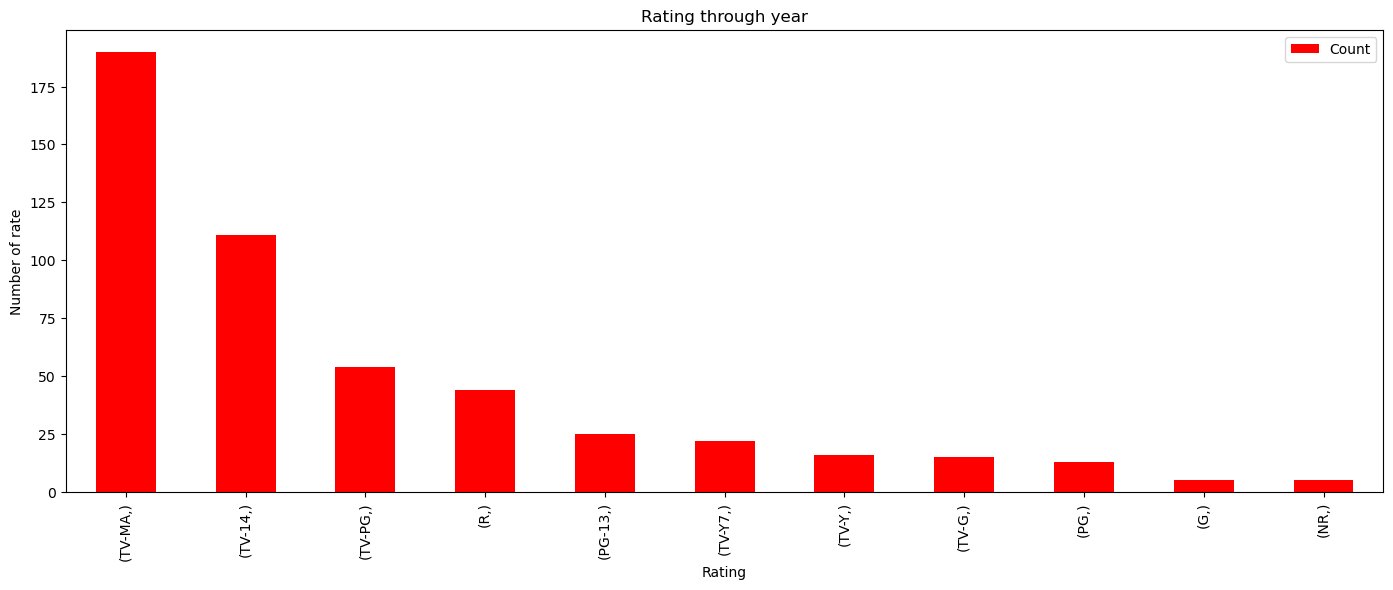

In [966]:
#Rating through year using bar chart
#Slicing data, and count the value in the column
df_slice = df.loc[:, ['rating']].value_counts()
#Convert series to data frame
df_rating = df_slice.to_frame()
#Rename column
df_rating.columns = ['Count']
#Plot the bar chart
df_rating.plot(kind = 'bar', figsize = (17, 6), color = 'r')
plt.title('Rating through year')
plt.xlabel('Rating')
plt.ylabel('Number of rate')
plt.show()

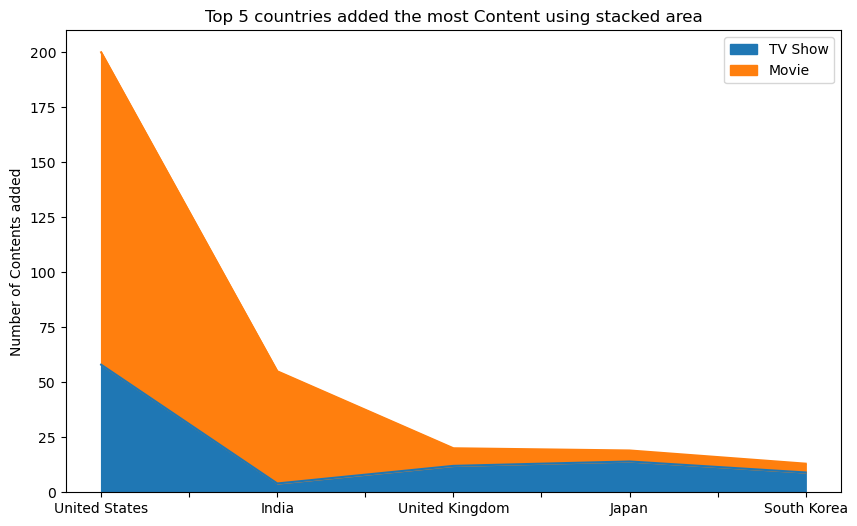

In [967]:
#Top 5 countries added the most Content using stacked area
#Slicing data, group by country to caculate total value from Movie and TV Show
df_group = df.loc[:, ['country', 'TV Show', 'Movie']].groupby('country').sum()
#Add new column to the data frame and caculate the total Content
df_group['Total'] = df_group.sum(axis = 1)
#Sort the value in descending order
df_group.sort_values(by = 'Total', ascending = False, inplace = True)
#Define new data frame
df_country = df_group.head()
#Plot the area chart
df_country.loc[:,'TV Show':'Movie'].plot(kind = 'area', figsize = (10, 6), )
plt.title('Top 5 countries added the most Content using stacked area')
plt.xlabel('')
plt.ylabel('Number of Contents added')
plt.show()

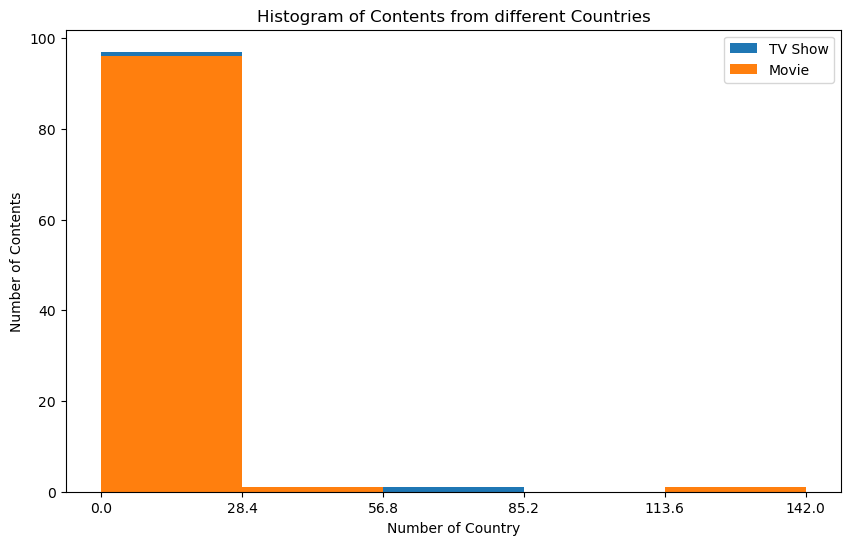

In [968]:
#Histogram of Contents from different Countries
#Slicing data, group by country to caculate total value from Movie and TV Show
df_group = df.loc[:, ['country', 'TV Show', 'Movie']].groupby('country').sum()
#Add new column to the data frame and caculate the total Content
df_group['Total'] = df_group.sum(axis = 1)
#Sort the value in descending order
df_group.sort_values(by = 'Total', ascending = False, inplace = True)
#The histrogram method breaks up the dataset into 5 bins. 
count, bin_edges = np.histogram(df_group.loc[:,['TV Show', 'Movie']], 5)
#Plot the histogram chart
df_group.loc[:,['TV Show', 'Movie']].plot(kind = 'hist', figsize = (10, 6), bins = 5, xticks = bin_edges)
plt.title('Histogram of Contents from different Countries')
plt.xlabel('Number of Country')
plt.ylabel('Number of Contents')
plt.show()

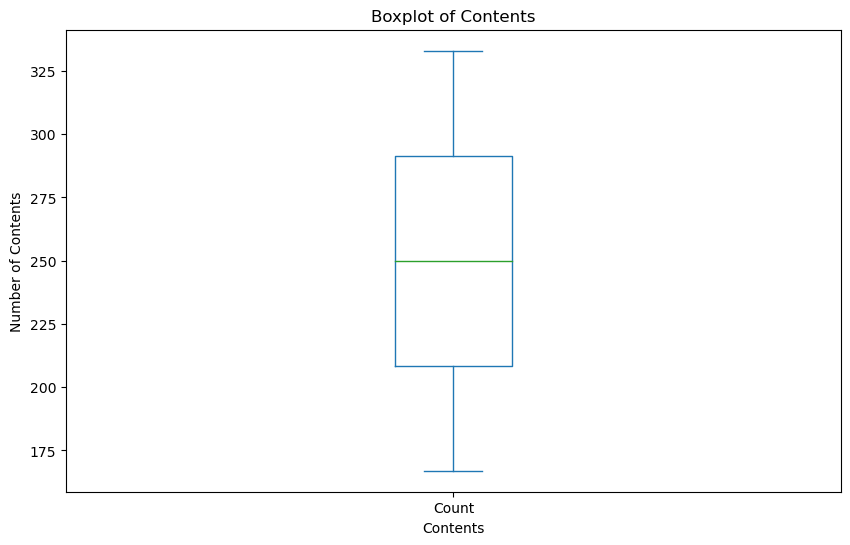

In [969]:
#Boxplotof Contents
#Slicing data, caculate total value from Movie and TV Show and reset index as default
df_group = df.loc[:,['TV Show', 'Movie']].sum().reset_index()
#Add new columns to data frame
df_group.columns = ['Content', 'Count']
#Plot the box plot
df_group.plot(kind = 'box', figsize = (10, 6))
plt.title('Boxplot of Contents')
plt.xlabel('Contents')
plt.ylabel('Number of Contents')
plt.show()